# Histogram Equalization
# HOW TO Equalize Histograms Of Images 

INDEX

01 step - Equalizing Manually 

02 step - And by using the OpenCV function

#### What is an Image Histogram?

It is a graphical representation of the intensity distribution of an image.
It quantifies the number of pixels for each intensity value considered.

### 01 step - Equalizing Manually

In [1]:
%matplotlib inline
from IPython.display import display, Math, Latex

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open('DATA/einstein.jpg')

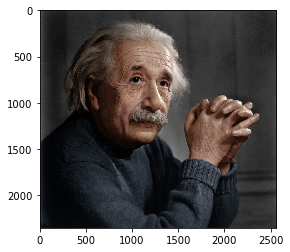

In [2]:
# display the color image
plt.imshow(img)

In [3]:
# convert image into a numpy array
img = np.asanyarray(img)

In [4]:
img.shape

(2354, 2560, 3)

In [5]:
# Converting RGB to Gray Scale
import cv2
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [6]:
img.shape

(2354, 2560)

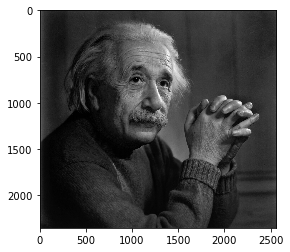

In [7]:
# display the image
plt.imshow(img, cmap='gray')

In [8]:
img.max()

255

In [9]:
img.min()

0

In [10]:
flat = img.flatten()

In [11]:
img.shape

(2354, 2560)

In [12]:
# 1 row 2354 x 2560 = 6.026.240
flat.shape

(6026240,)

(array([2.17773e+05, 4.38270e+05, 2.38467e+05, 2.05857e+05, 2.40353e+05,
        2.69704e+05, 2.69782e+05, 3.24435e+05, 4.35273e+05, 5.81221e+05,
        7.16937e+05, 4.86220e+05, 2.46035e+05, 1.60805e+05, 1.21915e+05,
        9.72260e+04, 1.02041e+05, 8.88160e+04, 7.94430e+04, 7.80110e+04,
        8.77320e+04, 6.09220e+04, 5.29970e+04, 4.65110e+04, 4.19670e+04,
        3.91020e+04, 3.61180e+04, 3.23130e+04, 3.05140e+04, 3.11700e+04,
        3.43560e+04, 2.27070e+04, 1.83980e+04, 1.51200e+04, 1.34130e+04,
        1.12400e+04, 9.86600e+03, 8.10900e+03, 6.80500e+03, 5.75200e+03,
        5.91100e+03, 3.87900e+03, 3.15900e+03, 2.49600e+03, 1.85900e+03,
        1.65100e+03, 1.33000e+03, 1.02400e+03, 6.96000e+02, 5.39000e+02]),
 array([  0. ,   5.1,  10.2,  15.3,  20.4,  25.5,  30.6,  35.7,  40.8,
         45.9,  51. ,  56.1,  61.2,  66.3,  71.4,  76.5,  81.6,  86.7,
         91.8,  96.9, 102. , 107.1, 112.2, 117.3, 122.4, 127.5, 132.6,
        137.7, 142.8, 147.9, 153. , 158.1, 163.2, 168.3

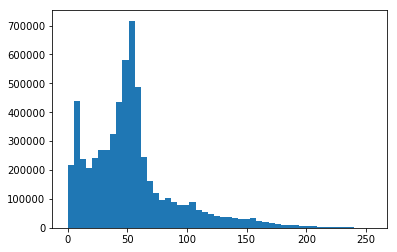

In [13]:
# show the histogram
plt.hist(flat, bins=50)

### What is Histogram Equalization?
To make it clearer, from the image above, you can see that the pixels seem clustered around the middle of the available range of intensities. What Histogram Equalization does is to stretch out this range. 

In [14]:
# formula for creating the histogram
display(Math(r'P_x(j) = \sum_{i=0}^{j} P_x(i)'))

<IPython.core.display.Math object>

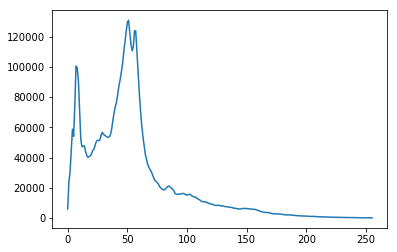

In [15]:
# create our own histogram function
def get_histogram(image, bins):
    # array with size of bins, set to zeros
    histogram = np.zeros(bins)
    
    # loop through pixels and sum up counts of pixels
    for pixel in image:
        histogram[pixel] += 1
    
    # return our final result
    return histogram

hist = get_histogram(flat, 256)

plt.plot(hist)

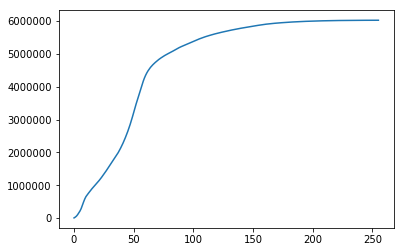

In [16]:
# create our cumulative sum function
def cumsum(a):
    a = iter(a)
    b = [next(a)]
    for i in a:
        b.append(b[-1] + i)
    return np.array(b)

# execute the fn
cs = cumsum(hist)

# display the result
plt.plot(cs)

In [17]:
# formula to calculate cumulation sum
display(Math(r's_k = \sum_{j=0}^{k} {\frac{n_j}{N}}'))

<IPython.core.display.Math object>

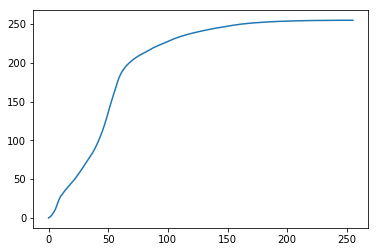

In [18]:
# re-normalize cumsum values to be between 0-255

# numerator & denomenator
nj = (cs - cs.min()) * 255
N = cs.max() - cs.min()

# re-normalize the cdf
cs = nj / N

plt.plot(cs)

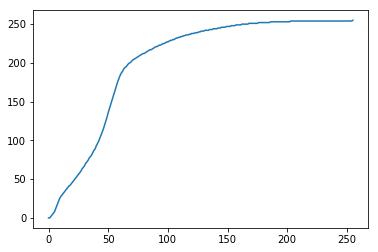

In [19]:
# cast it back to uint8 since we can't use floating point values in images
cs = cs.astype('uint8')

plt.plot(cs)

(array([104966., 112807.,  75259., 199896.,  90921., 124204., 142433.,
         85482., 121944., 132662., 150146., 102817., 111480., 110252.,
        107774., 162783.,  59530., 135387., 150780.,  82198., 179367.,
         96826., 102081., 110096., 116372., 123300., 129372., 130882.,
        123182., 115192., 110614., 113303., 123764., 123904., 110476.,
         97278., 154562., 116142., 129893., 132037., 150683., 116602.,
        121574., 113136., 125361., 117518., 124674., 118235., 116630.,
        119463.]),
 array([  0. ,   5.1,  10.2,  15.3,  20.4,  25.5,  30.6,  35.7,  40.8,
         45.9,  51. ,  56.1,  61.2,  66.3,  71.4,  76.5,  81.6,  86.7,
         91.8,  96.9, 102. , 107.1, 112.2, 117.3, 122.4, 127.5, 132.6,
        137.7, 142.8, 147.9, 153. , 158.1, 163.2, 168.3, 173.4, 178.5,
        183.6, 188.7, 193.8, 198.9, 204. , 209.1, 214.2, 219.3, 224.4,
        229.5, 234.6, 239.7, 244.8, 249.9, 255. ]),
 <a list of 50 Patch objects>)

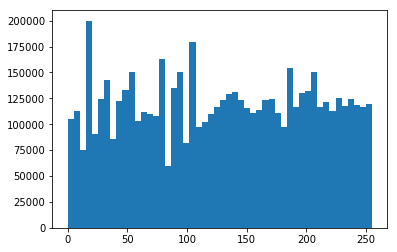

In [20]:
# get the value from cumulative sum for every index in flat, and set that as img_new
img_new = cs[flat]

# we see a much more evenly distributed histogram
plt.hist(img_new, bins=50)

### How does it work?
Equalization implies mapping one distribution (the given histogram) to another distribution (a wider and more uniform distribution of intensity values) so the intensity values are spread over the whole range.

(array([104966., 112807.,  75259., 199896.,  90921., 124204., 142433.,
         85482., 121944., 132662., 150146., 102817., 111480., 110252.,
        107774., 162783.,  59530., 135387., 150780.,  82198., 179367.,
         96826., 102081., 110096., 116372., 123300., 129372., 130882.,
        123182., 115192., 110614., 113303., 123764., 123904., 110476.,
         97278., 154562., 116142., 129893., 132037., 150683., 116602.,
        121574., 113136., 125361., 117518., 124674., 118235., 116630.,
        119463.]),
 array([  0. ,   5.1,  10.2,  15.3,  20.4,  25.5,  30.6,  35.7,  40.8,
         45.9,  51. ,  56.1,  61.2,  66.3,  71.4,  76.5,  81.6,  86.7,
         91.8,  96.9, 102. , 107.1, 112.2, 117.3, 122.4, 127.5, 132.6,
        137.7, 142.8, 147.9, 153. , 158.1, 163.2, 168.3, 173.4, 178.5,
        183.6, 188.7, 193.8, 198.9, 204. , 209.1, 214.2, 219.3, 224.4,
        229.5, 234.6, 239.7, 244.8, 249.9, 255. ]),
 <a list of 50 Patch objects>)

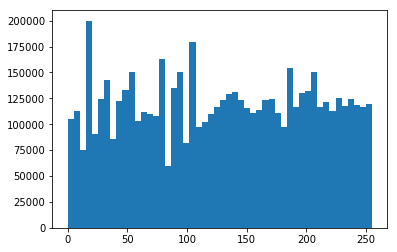

In [21]:
# get the value from cumulative sum for every index in flat, and set that as img_new
img_new = cs[flat]

# we see a much more evenly distributed histogram
plt.hist(img_new, bins=50)

In [22]:
# put array back into original shape since we flattened it
img_new = np.reshape(img_new, img.shape)
img_new

array([[233, 231, 228, ..., 216, 216, 215],
       [233, 230, 228, ..., 215, 215, 214],
       [233, 231, 229, ..., 213, 213, 212],
       ...,
       [115, 107,  96, ..., 180, 187, 194],
       [111, 103,  93, ..., 187, 189, 192],
       [111, 103,  93, ..., 187, 189, 192]], dtype=uint8)

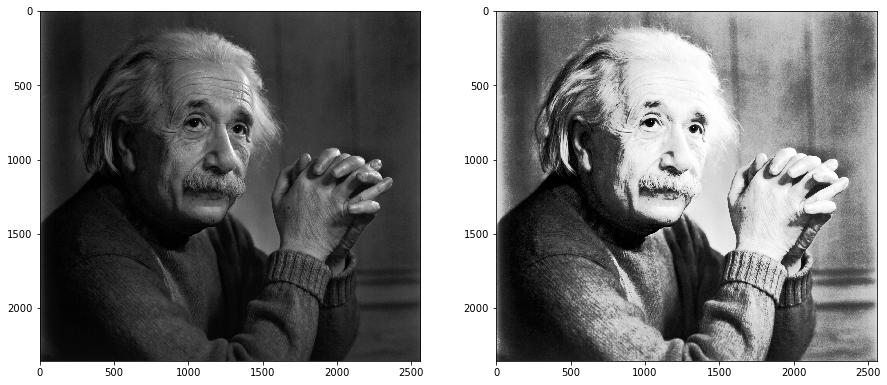

In [23]:
# set up side-by-side image display
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(1,2,1)
plt.imshow(img, cmap='gray')

# display the new image
fig.add_subplot(1,2,2)
plt.imshow(img_new, cmap='gray')

plt.show(block=True)

## Using OpenCV equalizeHist(img) Method

### 02 step - And by using the OpenCV function

In [24]:
# Reading image via OpenCV and Equalize it right away!
img = cv2.imread('DATA/einstein.jpg',0)
equ = cv2.equalizeHist(img)

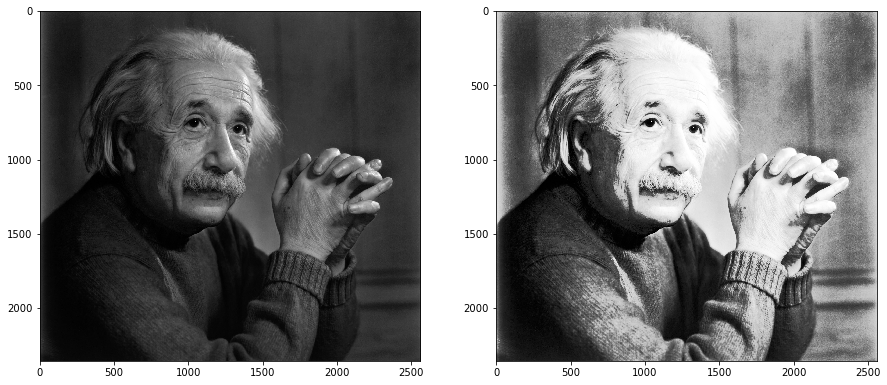

In [25]:
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(1,2,1)
plt.imshow(img, cmap='gray')

# display the Equalized (equ) image
fig.add_subplot(1,2,2)
plt.imshow(equ, cmap='gray')

plt.show(block=True)

In [26]:
print("That´s it! Thank you once again!\nI hope will be helpful.")

That´s it! Thank you once again!
I hope will be helpful.
